In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Address the data
data_path = '../dataset/secom.data'
labels_path = '../dataset/secom_labels.data'

# Load the SECOM data and label
secom_data = pd.read_csv(data_path, sep='\s+', header=None)
secom_labels = pd.read_csv(labels_path, sep='\s+', header=None, usecols=[0], names=['Label'])


In [3]:
# Display first 5 data and labels in the dataset

print("First 5 data: \n")
secom_data.head()


First 5 data: 



,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [4]:
print("\n First 5 labels: \n")
secom_labels.head()


 First 5 labels: 



,Label
0,-1
1,-1
2,1
3,-1
4,-1


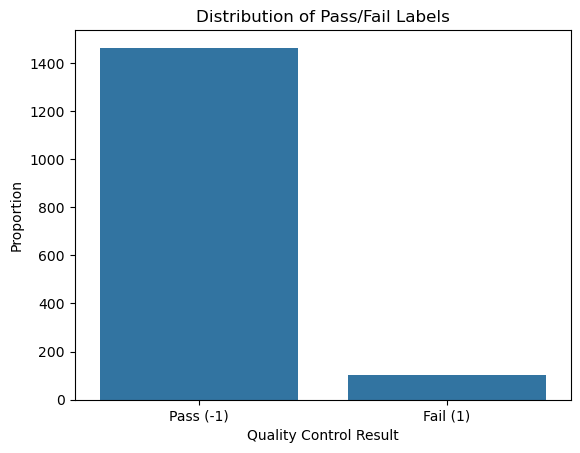

In [5]:
target_distribution = secom_labels.iloc[:, 0].value_counts()

sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title("Distribution of Pass/Fail Labels")
plt.ylabel("Proportion")
plt.xlabel("Quality Control Result")
plt.xticks(ticks=[0, 1], labels=["Pass (-1)", "Fail (1)"])
plt.show()

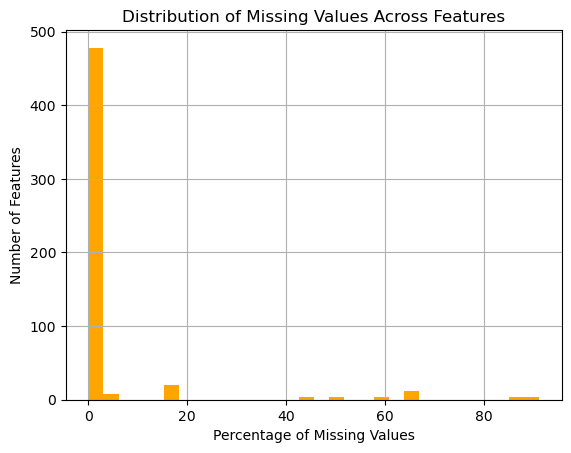

In [6]:
missing_values_percentage = pd.DataFrame(secom_data.isnull().mean() * 100, columns=['MissingPercentage'])
missing_values_percentage[missing_values_percentage['MissingPercentage'] > 0].hist(bins=30, color='orange')
plt.title("Distribution of Missing Values Across Features")
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Number of Features")
plt.show()


In [7]:
summary_statistics = secom_data.describe().T
print(summary_statistics.head())

    count         mean         std        min        25%        50%  \
0  1561.0  3014.452896   73.621787  2743.2400  2966.2600  3011.4900   
1  1560.0  2495.850231   80.407705  2158.7500  2452.2475  2499.4050   
2  1553.0  2200.547318   29.513152  2060.6600  2181.0444  2201.0667   
3  1553.0  1396.376627  441.691640     0.0000  1081.8758  1285.2144   
4  1553.0     4.197013   56.355540     0.6815     1.0177     1.3168   

         75%        max  
0  3056.6500  3356.3500  
1  2538.8225  2846.4400  
2  2218.0555  2315.2667  
3  1591.2235  3715.0417  
4     1.5257  1114.5366  
